## Introduction to ordinary differential equations (ODEs) and the initial value problem (IVP)

#### Required packages

This code was tested on Python 3 ipykernel (3.12.2) so check that one

In [37]:
import platform
print(platform.python_version())

3.12.2


At least the following Conda packages are needed and the installation order might effect to their workings:

```
conda install anaconda::scipy
conda install anaconda::numpy
conda install conda-forge::matplotlib
conda install anaconda::jupyter
conda install pytorch torchvision torchaudio cpuonly -c pytorch
conda install conda-forge::pytorch-model-summary
```

### System 1: Simple pendulum

See the description at [Wikipedia](https://en.wikipedia.org/wiki/Pendulum_(mechanics)) and the derivation of the state-space model [here](https://akhatib.com/simple-state-space-model-of-a-pendulum/)

According to them write the ODE function that maps the current state to their derivatives. This ODE is non-linear. 

In [38]:
def f(t_, x_):
    g = -9.81
    l = 2.0
    dotx = np.empty(x_.shape)
    dotx[0] = x_[1] # angular velocity
    dotx[1] = -g/l*np.sin(x_[0]) # angular acceleration
    return dotx

### Initial value problem (IVP)

Initial value problem is to solve the system state $x$ at time instant $t$ given the system ODEs of the form $\dot{x} = f(x,x_0,t)$ s.t. the initial system value $x_0$ is known. This can be solved by ODE solver.

### ODE solvers

The simplest is the forward Euler (FE) method for which the main parameter is the step size.

#### FE for simple pendulum (too long step size $\Delta t$)

100 points evaluated
Min step 0.09999999999999964 and max step 0.10000000000000142


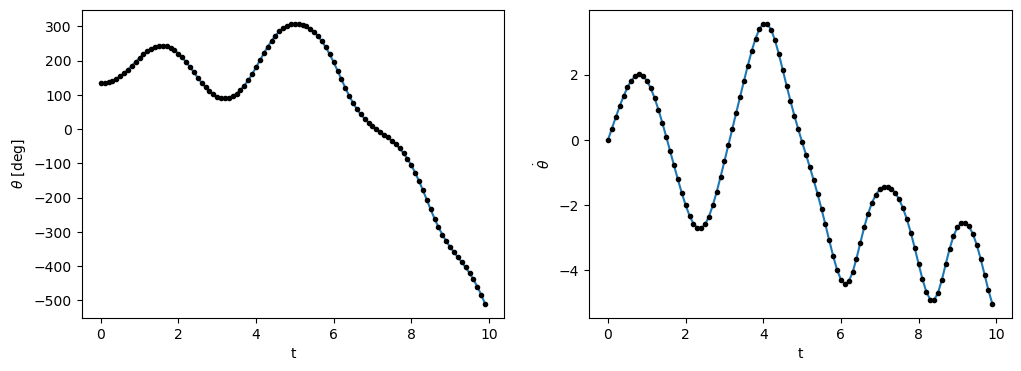

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

Delta_t = 0.1

t_0 = 0.0
t_n = 10.0
t_eval = np.arange(t_0, t_n, Delta_t)
y0 = [np.pi-np.pi/4, 0] # np.pi is pointing downwards and leads to no dynamic behavior, initial angular velocity is zero

# Name similar to ODE solver that returns class with sol.t and sol.y
sol_t = t_eval
sol_y = np.empty((2,sol_t.shape[0]))
sol_y[:,0] = y0

for n in range(0,len(sol_t)-1):
    sol_y[:,n+1] = sol_y[:,n]+Delta_t*f(sol_t[n], sol_y[:,n])

print(f'{len(sol_t)} points evaluated')
print(f'Min step {np.min(sol_t[1:]-sol_t[0:-1])} and max step {np.max(sol_t[1:]-sol_t[0:-1])}')
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol_t, sol_y[0,:]*180/np.pi)
plt.plot(sol_t, sol_y[0,:]*180/np.pi,'k.')
plt.xlabel('t')
plt.ylabel(r'$\theta$ [deg]')
plt.subplot(122)
plt.plot(sol_t, sol_y[1,:])
plt.plot(sol_t, sol_y[1,:],'k.')
plt.xlabel('t')
plt.ylabel(r'$\dot\theta$')
plt.tight_layout
#plt.savefig('ode_pendulum_euler_100pts.png')
plt.show()

#### FE for simple pendulum (sufficient step size)

Let's define the plot function

In [32]:
def pendulum_plot(t_,y_):
    plt.figure(figsize = (12, 4))
    plt.subplot(121)
    plt.plot(t_, y_[0,:]*180/np.pi)
    plt.plot(t_, y_[0,:]*180/np.pi,'k.')
    plt.xlabel('time t [s]')
    plt.ylabel(r'$\theta$ [deg]')
    plt.subplot(122)
    plt.plot(t_, y_[1,:])
    plt.plot(t_, y_[1,:],'k.')
    plt.xlabel('time t [s]')
    plt.ylabel(r'$\dot\theta$ [rad/s]')
    #plt.tight_layout
    #plt.savefig('ode_pendulum_euler_100pts.png')
    plt.show()

2000 points evaluated
Min step 0.004999999999999005 and max step 0.005000000000000782


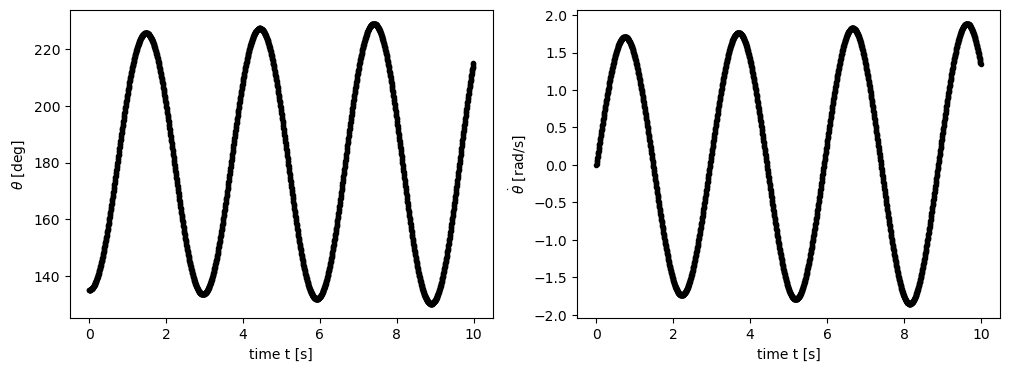

In [33]:
Delta_t = 0.005

t_0 = 0.0
t_n = 10.0
t_eval = np.arange(t_0, t_n, Delta_t)
y0 = [np.pi-np.pi/4, 0] # np.pi is pointing downwards and leads to no dynamic behavior, initial angular velocity is zero

# Name similar to ODE solver that returns class with sol.t and sol.y
sol_t = t_eval
sol_y = np.empty((2,sol_t.shape[0]))
sol_y[:,0] = y0

for n in range(0,len(sol_t)-1):
    sol_y[:,n+1] = sol_y[:,n]+Delta_t*f(sol_t[n], sol_y[:,n])

print(f'{len(sol_t)} points evaluated')
print(f'Min step {np.min(sol_t[1:]-sol_t[0:-1])} and max step {np.max(sol_t[1:]-sol_t[0:-1])}')
pendulum_plot(sol_t, sol_y)

#### Adaptive stepsize Runge-Kutta-Fehlberg (RK45) - using error tolerance thresholds

47 points evaluated
Min step 0.011340313177106789 and max step 0.25686236602027934


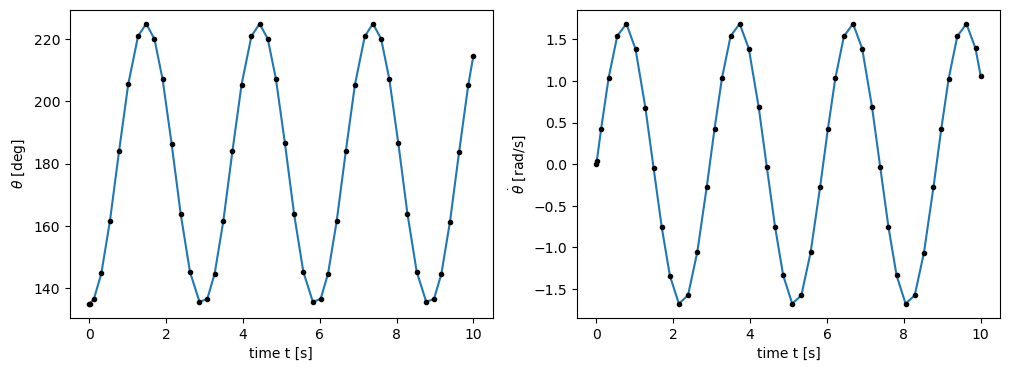

In [35]:
sol = solve_ivp(f, [t_0, t_n], y0, method = 'RK45', rtol=0.000025, atol=0.000001) #t_eval=np.arange(0, 10, 0.01))

print(f'{len(sol.t)} points evaluated')
print(f'Min step {np.min(sol.t[1:]-sol.t[0:-1])} and max step {np.max(sol.t[1:]-sol.t[0:-1])}')
pendulum_plot(sol.t, sol.y)

#### Adaptive stepsize Runge-Kutta-Fehlberg (RK45) - user given evaluation points (can be used to generate training data)

200 points evaluated
Min step 0.049999999999998934 and max step 0.05000000000000071


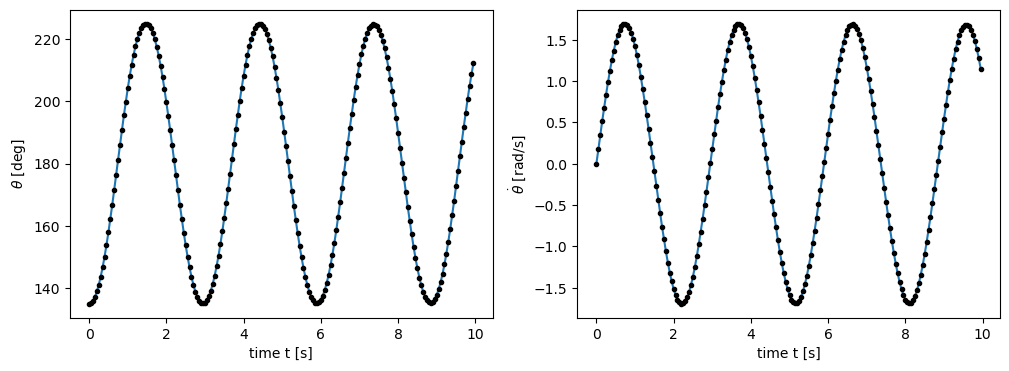

In [36]:
# Instead of tolerance we can also fix the points from which we want ODE45 outputs
Delta_t = 0.05
t_0 = 0.0
t_n = 10.0
t_eval = np.arange(t_0, t_n, Delta_t)

sol = solve_ivp(f, [t_0, t_n], y0, method = 'RK45', t_eval=t_eval)

print(f'{len(sol.t)} points evaluated')
print(f'Min step {np.min(sol.t[1:]-sol.t[0:-1])} and max step {np.max(sol.t[1:]-sol.t[0:-1])}')
pendulum_plot(sol.t, sol.y)

The ML problem is learn solution to the initial value problem from data.